# Good Python plotting practices: C) rcparams

### ESOpy 2.0 @ Vitacura - 09-11 January 2018 - fvogt@eso.org

**premise:** 
- matplotlib is the one-stop shop for all 2-D plotting in Python. Easy to make rapid plots & tons of examples.   
- **But at times frustrating** to get beautiful & complex plots

**rcParams:** 
- the way to deal with generic plot parameters like fontsize, colorscheme, etc ...  
- http://matplotlib.org/users/customizing.html

**utility**: 
- essential for those fed up of re-inventing the wheel
- essential to get $\LaTeX$ working properly

**cost**: 
- $\sim$10 lines  

**gain**:
- total control over the plot
- accuracy
- elegance
- infinite powers
- ...

** take-home message **: 
- rcParams is worth it, once you know your style - or if you "seriously" need $\LaTeX$ !


### A1) Motivation: how to label a line-ratio diagram ? 

I.e. how does one **properly** type the name of a forbidden emission line like $[\text{O}\,\rm{\scriptsize III}]$ ?

My answer: $[\text{O}\,\rm{\scriptsize III}]=$[O\,\textsc{\smaller III}]

\smaller comes from the "relsize" packages. In an article .tex file, it ensures that the size ratio is conserved in Figure captions, footnotes, etc ...: any place with smaller fontsize !


### A2) Motivation: how to ensure consistent font size for all plots in an article/report ? 

My answer: by fixing the width of the plot to 6.92 (or 14.16) inches and the fontsize to 16. This corresponds to a 1-column (2-columns) plot in A&A (with 50% scaling).

### B) $\LaTeX$ and matplotlib

Some basic $\LaTeX$ commands are already accessible in matplotlib by default, e.g.:

Populating the interactive namespace from numpy and matplotlib


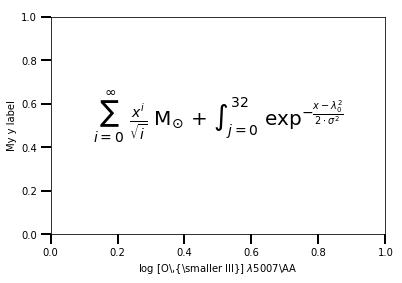

In [7]:
# Use some notebook magic - forget the next line in normal scripted code
%pylab inline

import matplotlib.pyplot as plt # Gives access to basic plotting functions

# Note the leading "r" !
plt.text(0.5,0.5,
         r'$\sum_{i=0}^\infty\ \frac{x^i}{\sqrt{i}}$ M$_{\odot}$ + $\int_{j=0}^{32}\ \exp^{-\frac{x-\lambda_0^2}{2\cdot\sigma^2}}$',
         horizontalalignment='center',
         fontsize=20)

plt.ylabel(r'My y label')
plt.xlabel(r'$\log$ [O\,{\smaller III}] $\lambda$5007\AA')

plt.tick_params(size=10,width=2)

But you will not get access to special packages, exotic symbols, etc ... In particular, there is no elegant way to typeset a forbidden emission line ... sigh! 

**Also, what's with the ticks on the outside of the plot ??!**

The solution: tell matplotlib to use your default system-$\LaTeX$ instead !

### B) Set up rcParams to improve things

In [6]:
# And now, the rcParams awesome sauce !
import matplotlib as mpl

#mpl.rc('MacOSX')

# Default fonts - only used if usetex = False. The fontsize remains important though.
mpl.rc('font',**{'family':'sans-serif', 'serif':['Computer Modern Serif'], 
             'sans-serif':['Helvetica'], 'size':16, 
             'weight':500, 'variant':'normal'}) 

# You can set many more things in rcParams, like the default label weight, etc ...
mpl.rc('axes',**{'labelweight':'normal', 'linewidth':1})

# Change the stupid new outer ticks to inner ticks ... and show them all around
mpl.rc('ytick',**{'major.pad':8, 'major.size':8, 'minor.size':4, 'minor.visible':True,
                  'color':'k', 'direction':'in', 'right':True})
mpl.rc('xtick',**{'major.pad':8, 'major.size':8, 'minor.size':4, 'minor.visible':True,
                  'color':'k', 'direction':'in', 'top':True})

mpl.rc('contour', **{'negative_linestyle':'solid'}) # dashed | solid

# The default matplotlib LaTeX - only matters if usetex=False.
mpl.rc('mathtext',**{'default':'regular','fontset':'cm', 'bf':'monospace:bold'})

# This is where the magic happens !
mpl.rc('text', **{'usetex':True}) 

# And this is how one can load exotic packages to fullfill one's dreams !
mpl.rc('text.latex',preamble=r'\usepackage{cmbright},\usepackage{relsize},\usepackage{upgreek}, \usepackage{amsmath}')


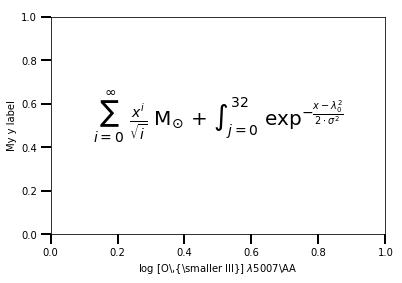

In [6]:
# Note the leading "r" !
plt.text(0.5,0.5,
         r'$\sum_{i=0}^\infty\ \frac{x^i}{\sqrt{i}}$ M$_{\odot}$ + $\int_{j=0}^{32}\ \exp^{-\frac{x-\lambda_0^2}{2\cdot\sigma^2}}$',
         horizontalalignment='center',
         fontsize=20)

plt.ylabel(r'My y label')
plt.xlabel(r'$\log$ [O\,{\smaller III}] $\lambda$5007\AA')

plt.tick_params(size=10,width=2)

### E) The "better" way to use rcparams all the time

An elegant way to do this consistently is to store this code in a dedicated Python script, e.g. "fpav.py" in my case. Put this somwehere on your Path, and load it everytime: this will effectively set your custom rcParams ! 

In this case, I put all the rcparams commands inside the file *give_me_pretty_plots.py* ... all that is required then is to import it !

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import give_me_pretty_plots as gmpp # THIS IS NO OFFICIAL PYTHON PACKAGE !

#### Congratulations, you have just started using your very own Python module !

By the way, you can add anything to your "fpav.py" file, constants that you re-use all the time, etc... e.g:

In [10]:
print(r'The width of a single / two column plot is %.2f / %.2f inches' % (gmpp.aa_1c,gmpp.aa_2c))
print(gmpp.aa_1c)

The width of a single / two column plot is 6.92 / 14.16 inches
6.92


**WARNING:** if you share your code with anyone else, it will fail if you don't give them your personal modules! Keep this in mind.


### F) Now, go back to the previous codes, and improve the look of all the plots with rcparams!